# Formation Rotation using SE3 and Homogenous Coordinates

This notebook handles formation rotation using homogenous coordinates. [Wiki](https://en.wikipedia.org/wiki/Homogeneous_coordinates)

We construct a rotation matrix that rotates points around the z-axis. This is similar to a 3x3 DCM matrix but can transform points as well.

## Homogenous coordinates

A point is represented as a vector: $p = \begin{bmatrix}x & y & z & 0 \end{bmatrix}^T$.

The extra 0 is added in the vector so that is can be transformed using an element of the SE3 group.

$R = \begin{bmatrix}C & p \\0 &  1\end{bmatrix}$, where C is a 3x3 direction cosine (DCM) matrix.

Note that $R$ is a 4x4 matrix.

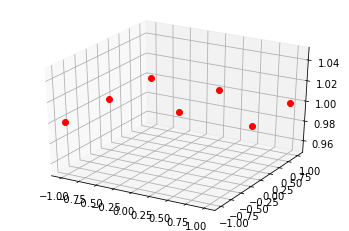

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

P = np.array([
    [-1, 1, 1],
    [0, 1, 1],
    [1, 1, 1],
    [-1, 0, 1],
    [0, 0, 1],
    [1, 0, 1],
    [-1, -1, 1]
]).T
ax = plt.axes(projection='3d')
ax.plot3D(P[0,:], P[1,:], P[2,:], 'ro')

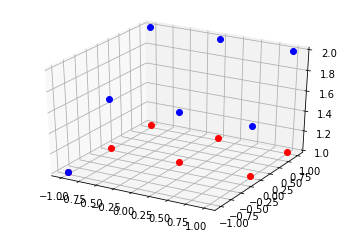

In [2]:
P2 = np.array([
    [-1, 1, 2],
    [0, 1, 2],
    [1, 1, 2],
    [-1, 0, 1.5],
    [0, 0, 1.5],
    [1, 0, 1.5],
    [-1, -1, 1]
]).T
ax = plt.axes(projection='3d')
ax.plot3D(P[0,:], P[1,:], P[2,:], 'ro')
ax.plot3D(P2[0,:], P2[1,:], P2[2,:], 'bo')

In [3]:
def rotate_points_z(P, theta):
    R = np.array([
        [np.cos(theta), np.sin(theta), 0, 0],
        [-np.sin(theta), np.cos(theta), 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
    ])
    P_h = np.vstack([P, np.zeros(P.shape[1])]) #homogenous coordinates
    return R.dot(P_h)[:3, :]

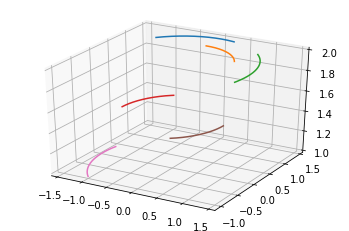

In [4]:
data = []
for theta in np.linspace(0, 1, 1000):
    data.append(rotate_points_z(P2, theta))
data = np.array(data)

ax = plt.axes(projection='3d')
for point in range(data.shape[2]):
    ax.plot3D(data[:,0,point], data[:,1,point], data[:,2,point], '-')

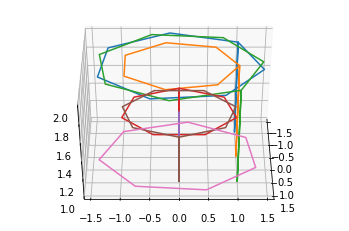

In [5]:
waypoints = [P]
for theta in np.linspace(0, 2*np.pi, 8):
    waypoints.append(rotate_points_z(P2, theta))
waypoints.append(P)
waypoints = np.array(waypoints)

ax = plt.axes(projection='3d')
for point in range(waypoints.shape[2]):
    ax.plot3D(waypoints[:,0,point], waypoints[:,1,point], waypoints[:,2,point], '-')
    ax.view_init(azim=0, elev=40)

In [6]:
dist = np.linalg.norm(waypoints[1:, :, :] - waypoints[:-1, :, :], axis=1)
dist_max = np.max(dist, axis=1)
dist_max

array([1.        , 1.22720854, 1.22720854, 1.22720854, 1.22720854,
       1.22720854, 1.22720854, 1.22720854, 1.        ])